# Quadrant analysis

Quadrant analysis is a simple conditional sampling method to detect coherent structures directly from the high-frequency measurements (e.g. @Katul1997) or simulations (e.g. @Wallace2016). Coherent structures maintain their structure for a significant time period, and due to their coherence, they can generate deviations from mean flow properties (e.g. @Jimenez2018). For quadrant analysis a scatter plot of a pair of two variables is considered, which are normalized through
$$ \hat{x} = \frac{x-\overline{x}}{\sigma_x}$$
by substracting the mean value $\overline{x}$ and dividing by $\sigma_x$ to make different variables with different value ranges comparable and centered around zero. Based on this, strength $S_i$ and duration $D_i$  of each quadrant ($i=1, ..., 4$) can be calculated:
$$ S_i = \frac{\overline{\hat{x}'\hat{w}'}_i}{\overline{\hat{x}\hat{w}}}, \quad\quad D_i = \frac{1}{t_s} \int_0^{t_s} I_i(t) dt$$
$S_i$ represents the relative strength of the respective quadrant (normalized by the total covariance) and $D_i$ the occurrence frequency of each quadrant (with averaging time $t_s$ and indicator function $I_i$).
To filter out particularly strong coherent structures, a hole size can be applied with the filter conditions $\vert \hat{x}\hat{y} \vert \le H \cdot \vert \overline{\hat{x}'\hat{y}'}\vert$ (hyperbolic curves in the figure). Usually, $y$ is chosen to be the vertical velocity $w$. The quadrant analysis is directly related to the fluxes by using the respective constituting quantities: $(u,w)$ for momentum flux, $(T,w)$ for sensible heat flux, $(q,w)$ for latent heat flux and $(c,w)$ for CO$_2$ flux -- as visualized in the figure (adapted from @Mack2024).

<img src="../figures/schema/qa_schema.png" />

In [2]:
#loading Reddy package
install.packages("../src/Reddy_0.0.0.9000.tar.gz",repos=NULL,source=TRUE,quiet=TRUE)
library(Reddy)

#ec data files
dir_in="../data/ec-data_10Hz_raw"
files=list.files(dir_in,full.names=TRUE)
nf=length(files)

## Calculation of occurrence frequencies and strengths of the four quadrants with `calc_quadrant_analysis`
To perform quadrant analysis, Reddy provides two functions: `calc_quadrant_analysis` for calculating occurrence frequency and strength of the four quadrants and `plot_quadrant_analysis` for plotting the two variables as scatter plot with a 2d kernel density estimation and a linear regression, as detailed below. <br>
The function `calc_quadrant_analysis` counts the occurrence frequency of each quadrant, calculates their strength as product $\hat{x}\hat{y}$ and as covariance $\overline{\hat{x}'\hat{y}'}$. The argument `do_normalization = TRUE` can be used to normalize the two variables and with `hole_sizes` one or several hole sizes can be applied. The output is a list containing $D_i$, $S_i$ for every quadrant and hole size.

In [7]:
i=8 #select a file
tmp=read.table(files[i],sep=",",header=T)

qa_Tw=calc_quadrant_analysis(tmp$T_degC,tmp$w_m.s) #based on the raw data (10 Hz) directly (i.e., unrotated)
str(qa_Tw)

List of 8
 $ hole_sizes       : int [1:11] 0 1 2 3 4 5 6 7 8 9 ...
 $ occurrence       : int [1:4, 1:11] 5448 2975 6619 2958 4689 144 3812 300 4232 8 ...
 $ product          : num [1:4, 1:11] 1.068 -0.291 0.619 -0.42 0.816 ...
 $ covariance       : num [1:4, 1:11] 0.10672 0.05309 -0.00914 0.03226 0.31902 ...
 $ covariance_total : num 0.15
 $ correlation_total: num 0.434
 $ product_total    : num [1:18000] 0.0448 -0.0544 -0.4983 0.115 0.3095 ...
 $ meta             : chr "Output format: rows represent the quadrants Q1, Q2, Q3, Q4 -- columns represent selected hole sizes"


## Plotting quadrant analysis with `plot_quadrant_analysis`
`plot_quadrant_analysis` plots a scatter plot of two variables with a 2d kernel density estimation (`MASS::kde2d`) and a linear regression (`lm()`) to allow for a visual inspection.

**Example: Quadrant Analysis (T,w) during daytime**

[1] "../data/ec-data_10Hz_raw/2018-07-20T120000.csv"

Call:
lm(formula = yval ~ xval)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5818 -0.5491  0.0005  0.5471  4.1136 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.849e-16  6.716e-03    0.00        1    
xval         4.337e-01  6.716e-03   64.58   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9011 on 17998 degrees of freedom
Multiple R-squared:  0.1881,	Adjusted R-squared:  0.1881 
F-statistic:  4170 on 1 and 17998 DF,  p-value: < 2.2e-16



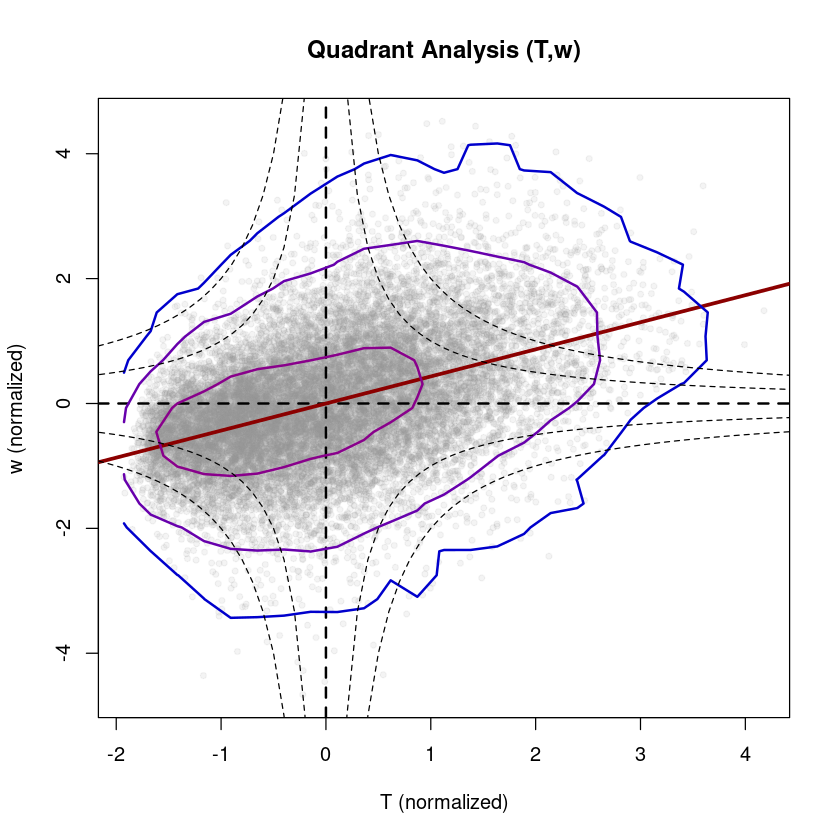

In [4]:
i=8 #select a file -- a daytime example
print(files[i])
tmp=read.table(files[i],sep=",",header=T)

plot_quadrant_analysis(tmp$T_degC,tmp$w_m.s,xlab="T (normalized)",ylab="w (normalized)",main="Quadrant Analysis (T,w)")

**Example: Quadrant Analysis (T,w) during nighttime**

[1] "../data/ec-data_10Hz_raw/2018-07-21T030000.csv"

Call:
lm(formula = yval ~ xval)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8334 -0.5262  0.0022  0.5425  6.2520 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.006e-17  7.120e-03    0.00        1    
xval        -2.957e-01  7.121e-03  -41.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9553 on 17998 degrees of freedom
Multiple R-squared:  0.08745,	Adjusted R-squared:  0.0874 
F-statistic:  1725 on 1 and 17998 DF,  p-value: < 2.2e-16



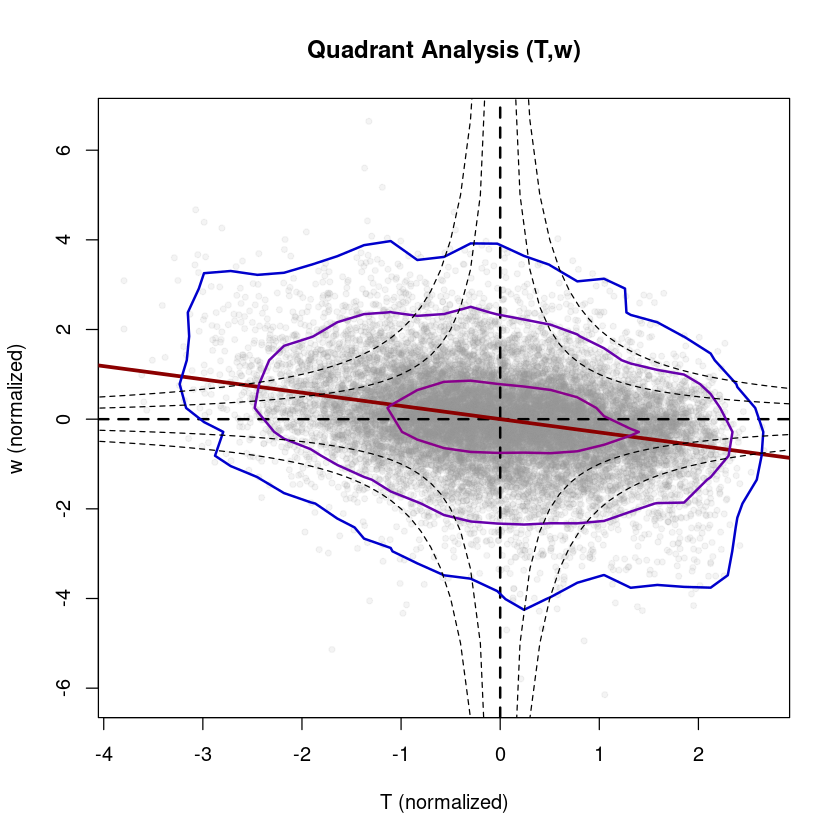

In [5]:
i=38 #select a file -- a nighttime example
print(files[i])
tmp=read.table(files[i],sep=",",header=T)
plot_quadrant_analysis(tmp$T_degC,tmp$w_m.s,xlab="T (normalized)",ylab="w (normalized)",main="Quadrant Analysis (T,w)") #based on the raw data (10 Hz) directly (i.e., unrotated)

**Example: Quadrant Analysis (u,w) during nighttime**


Call:
lm(formula = yval ~ xval)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9799 -0.5474 -0.0342  0.5301  6.6338 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.749e-16  7.326e-03    0.00        1    
xval        -1.843e-01  7.326e-03  -25.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9829 on 17998 degrees of freedom
Multiple R-squared:  0.03395,	Adjusted R-squared:  0.0339 
F-statistic: 632.5 on 1 and 17998 DF,  p-value: < 2.2e-16



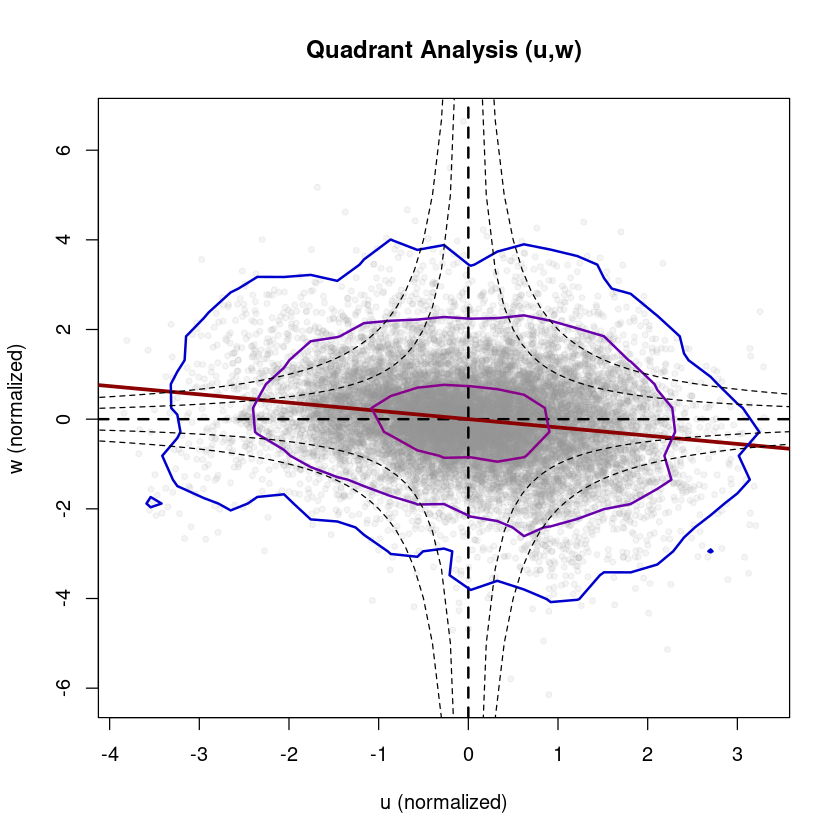

In [6]:
plot_quadrant_analysis(tmp$u_m.s,tmp$w_m.s,xlab="u (normalized)",ylab="w (normalized)",main="Quadrant Analysis (u,w)") #based on the raw data (10 Hz) directly (i.e., unrotated)

Quadrant analysis can be applied to any combination of two measured quantities and also allows to check the measurement quality or significance of the relation between them. It can also be used to check the effect of the coordinate rotation (e.g., `rotate_double`) visually. The concept can be extended to a combination of three variables in the framework of octant analysis.